Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9978 - loss: 0.1446
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0439
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0396 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0686 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - loss: 0.0270  
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0253
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0664
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0230
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0288 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - loss: 0.0099 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0104  
Test Accuracy: 99.50%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


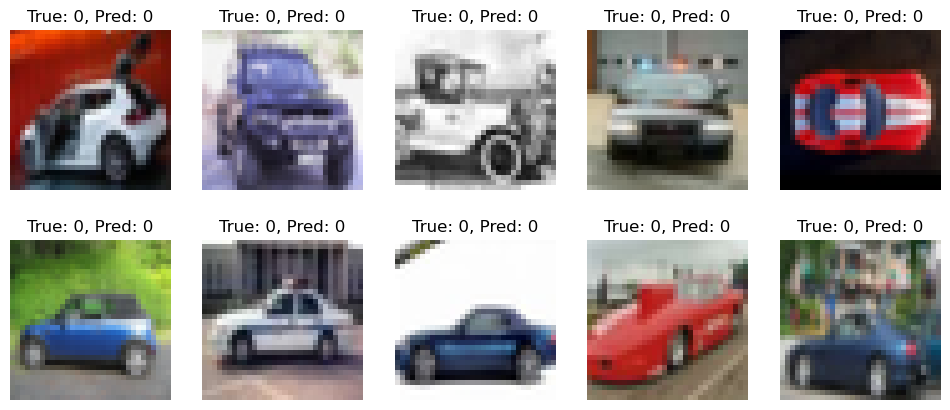

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
import glob

# Step 1: Load CIFAR-10 dataset and extract car images
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Extract cars (class label 1 in CIFAR-10)
car_train_images = x_train[y_train.flatten() == 1]
car_test_images = x_test[y_test.flatten() == 1]

# Select a subset of car images for training and testing
car_train_images = car_train_images[:1000]
car_test_images = car_test_images[:200]

# Step 2: Load gun images from the internet
# Assuming gun images are stored in a folder named 'gun_images' with 4 training and 1 testing image
gun_train_images = []
gun_test_images = []

for img_path in glob.glob('gun_images/train/*.jpg'):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))  # Resize to 32x32 to match CIFAR-10
    gun_train_images.append(img)

for img_path in glob.glob('gun_images/test/*.jpg'):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))  # Resize to 32x32 to match CIFAR-10
    gun_test_images.append(img)

gun_train_images = np.array(gun_train_images)
gun_test_images = np.array(gun_test_images)

# Step 3: Combine car and gun images into a single dataset
X_train = np.concatenate((car_train_images, gun_train_images))
y_train = np.array([0] * len(car_train_images) + [1] * len(gun_train_images))

X_test = np.concatenate((car_test_images, gun_test_images))
y_test = np.array([0] * len(car_test_images) + [1] * len(gun_test_images))

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# Step 4: Build and train the CNN model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 6: Visualize some results (optional)
preds = model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'True: {true_labels[i]}, Pred: {pred_labels[i]}')
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


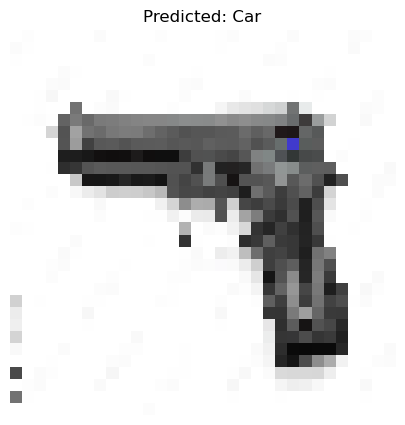

In [4]:
# Step 6: Predict using images from the 'test' folder
gun_test_images = np.array(gun_test_images)
gun_test_images = gun_test_images.astype('float32') / 255.0

predictions = model.predict(gun_test_images)
pred_labels = np.argmax(predictions, axis=1)

# Display the predictions
plt.figure(figsize=(10, 5))
for i, img in enumerate(gun_test_images):
    plt.subplot(1, len(gun_test_images), i + 1)
    plt.imshow(img)
    plt.title(f'Predicted: {"Gun" if pred_labels[i] == 1 else "Car"}')
    plt.axis('off')
plt.show()


 The dataset was not sufficient obsiously for guns